# 과제 1 - SVM 회귀


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')


In [5]:
import pandas as pd
boston = pd.read_csv("C:/Users/sshyu/Downloads/house_price.csv")
X = boston.drop(['MEDV'], axis = 1, inplace=False)
y = boston['MEDV']
# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 모델 생성
svr = LinearSVR(epsilon = 10)

# 모델 훈련
svr.fit(X_train, y_train)


LinearSVR(epsilon=10)

In [7]:
# 예측
y_pred = svr.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 80.8595883263965
R-squared: -0.10262398640501846


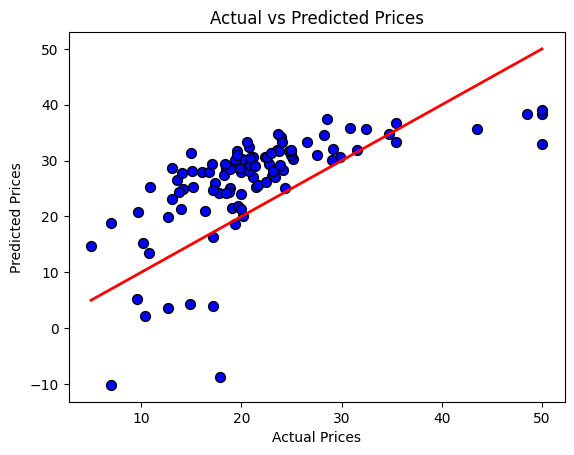

In [8]:
# 일부 feature를 사용하여 2D로 시각화
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


## 과제 1-1 : epsilon 값을 변경하면서 LinearSVR을 적합한 후, 결과를 확인하고 이유를 분석해주세요!

성능 평가 후 평가지표와 그래프를 사용해서 분석해주세요

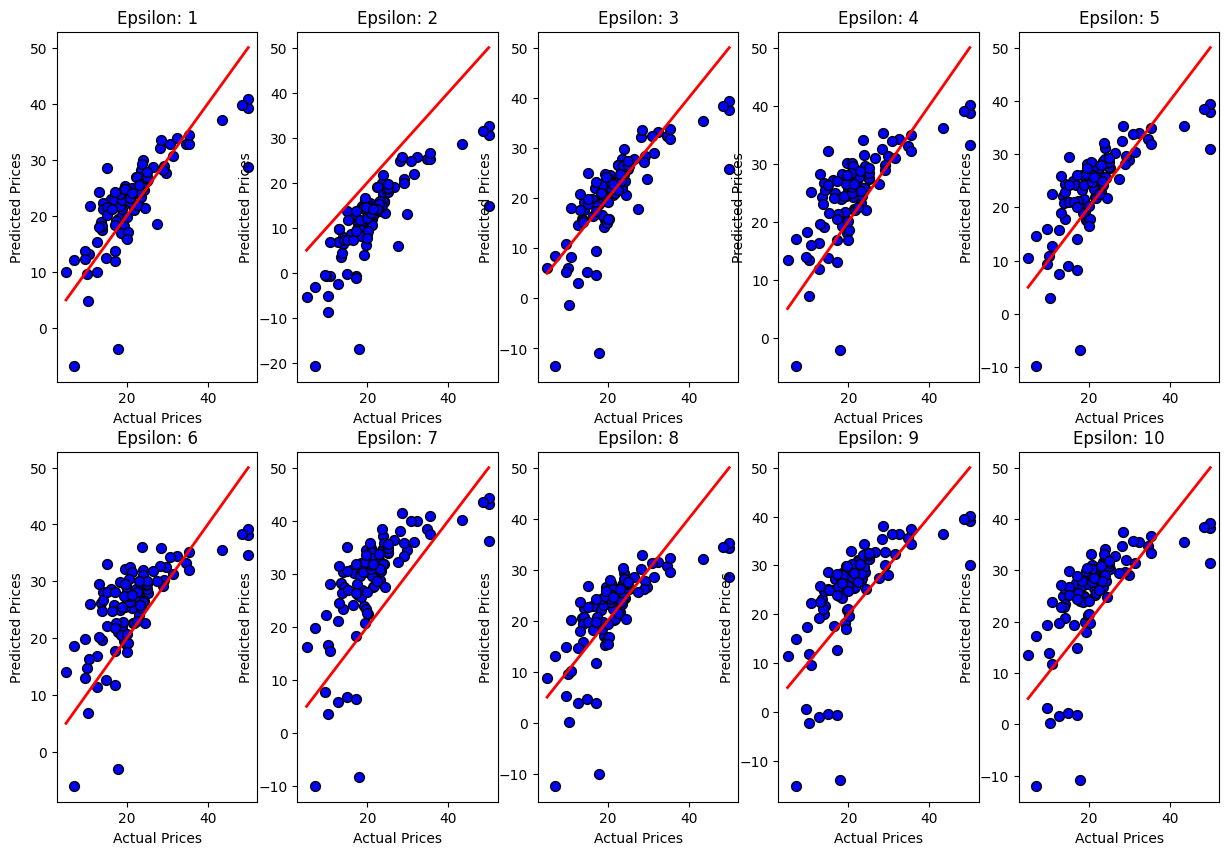

   Epsilon         MSE        R2
0        1   30.435738  0.584970
1        2  119.652397 -0.631614
2        3   37.866741  0.483639
3        4   47.376683  0.353958
4        5   43.861841  0.401888
5        6   59.758269  0.185120
6        7  112.656543 -0.536216
7        8   45.540184  0.379001
8        9   77.709710 -0.059671
9       10   76.671988 -0.045521


In [16]:
# Todo
# 성능 지표 저장을 위한 리스트 생성
results = []

# 결과를 비교할 서브플롯 생성
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

# epsilon 값을 1에서 10까지 각각 적합해보기
for idx, i in enumerate(range(1, 11)):
    # 모델 생성
    svr = LinearSVR(epsilon=i)
    # 모델 훈련
    svr.fit(X_train, y_train)
    # 예측
    y_pred = svr.predict(X_test)  
    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # 리스트에 저장
    results.append({"Epsilon": i, "MSE": mse, "R2": r2})
    # 시각화
    axes[idx].scatter(y_test, y_pred, color='blue', edgecolor='k', s=50)
    axes[idx].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    axes[idx].set_title(f'Epsilon: {i}')
    axes[idx].set_xlabel('Actual Prices')
    axes[idx].set_ylabel('Predicted Prices')

plt.show()
# 성능지표 출력
print(pd.DataFrame(results))

**[결과 해석]**
- epsilon은 SVR에서 예측 오차를 얼마나 허용할지를 결정하는 하이퍼파라미터로 epsilon 값이 작을 수록 모델이 데이터의 noise까지 학습하게 되어 과적합의 위험이 있음
- boston 데이터에서 epsilon 값이 1일 때가 MSE값이 약 30, 그리고 R2 score가 약 0.585로 가장 뛰어난 성능을 보임
- 또한 predicted, actual value를 시각화한 결과를 보아 boston 데이터셋에 noise와 outlier 가 비교적 적다는 것을 알 수 있음

# 과제 1-2 : SVM 분류

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

In [59]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 훈련 및 테스트 세트 분리
# ++ 추가로
# test_size=.2 일때 test accuracy 가 지나치게 높게 나와 일반화 성능을 위해 test_size를 0.35로 변경
# 또한 y 비율 맞춰서 train test split 을 했습니다!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42,stratify=y)

## 과제 1 - 2 trade-off 파라미터 C 값 설정

아래 수식처럼 C가 동작하는데, C가 작을수록 에러가 생겨도 가중치가 작기에 오버피팅을 막을 수 있음.

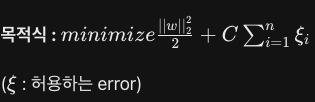


In [95]:
# 다양한 trade-off 파라미터 C 값 설정
# Todo
C_values = [0.1, 0.2, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 4, 5, 8, 10,] 
train_accuracies = []
test_accuracies = []
# 나중에 비교 위해 하나 더 만들기
accuracies = []

for C in C_values:
    # 모델 생성
    svc = LinearSVC(C=C)

    # 모델 훈련
    svc.fit(X_train, y_train)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    # 정확도 계산
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 결과 저장
    # 이때 C 값과 함께 저장하기
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    accuracies.append({'C': C, 'train_acc': train_acc, 'test_acc': test_acc})

    # 성능 출력
    print(f"C={C}:")
    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
    print("-" * 50)


C=0.1:
Training Accuracy: 0.9587628865979382
Testing Accuracy: 0.9245283018867925
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.78      0.88        18
           2       0.82      1.00      0.90        18

    accuracy                           0.92        53
   macro avg       0.94      0.93      0.92        53
weighted avg       0.94      0.92      0.92        53

--------------------------------------------------
C=0.2:
Training Accuracy: 0.9484536082474226
Testing Accuracy: 0.9245283018867925
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.78      0.88        18
           2       0.82      1.00      0.90        18

    accuracy                           0.92        53
   macro avg       0.94      0.93      0.92        53
weighted avg       0.94      0.9

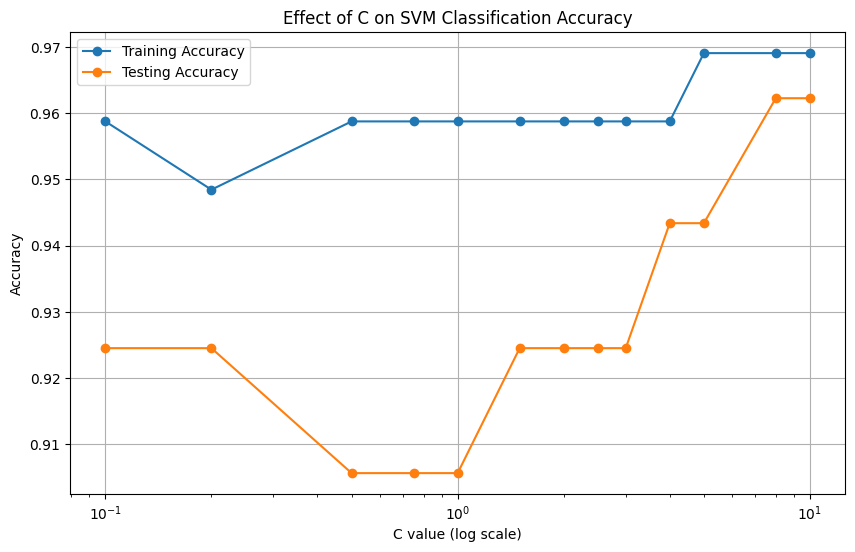

In [96]:
# C 값에 따른 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Classification Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
print(pd.DataFrame(accuracies))

        C  train_acc  test_acc
0    0.10   0.958763  0.924528
1    0.20   0.948454  0.924528
2    0.50   0.958763  0.905660
3    0.75   0.958763  0.905660
4    1.00   0.958763  0.905660
5    1.50   0.958763  0.924528
6    2.00   0.958763  0.924528
7    2.50   0.958763  0.924528
8    3.00   0.958763  0.924528
9    4.00   0.958763  0.943396
10   5.00   0.969072  0.943396
11   8.00   0.969072  0.962264
12  10.00   0.969072  0.962264


**[결과 해석]**
- C 값이 작을수록 모델이 더 많은 오차를 허용함
- C 가 0.2 보다 작을 때 train accuracy가 test accuracy 보다 값이 높은 것으로 보아 과소적합 상태임이 확인됨
- C가 8보다 클 때 train/test accuracy가 모두 가장 높은 것으로 보아 모델이 train data를 잘 학습하고 테스트 test에 대한 일반화 성능도 높음을 알 수 있음